# Architecture of our ANN (Artificial Neural Network) / MLP (Multi Layer Perceptron)

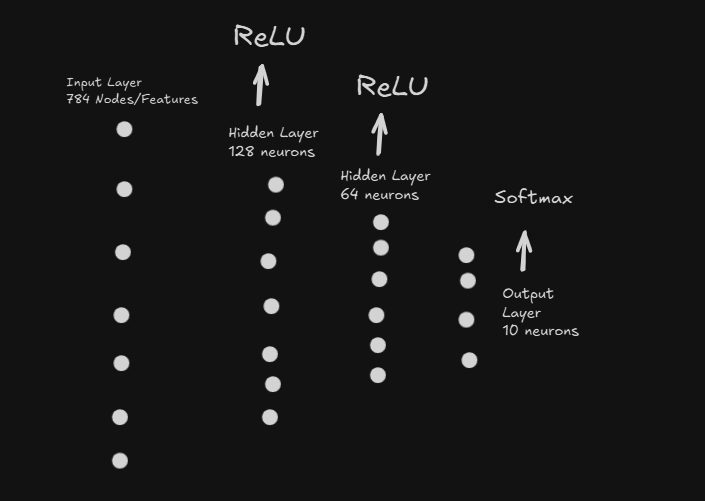

Model is looking at a 28x28 pixel image of clothing and predicting: "Which of the 10 fashion categories does this image most likely belong to?"

Using ReLU as AF for introducing Non-Linearity and Softmax to convert raw scores into clear probabilities that sum to 100%, so we can see exactly how confident the model is about each possible answer because this is multi class classification problem

For your Fashion MNIST: It turns numbers like `[5.2, 1.1, 0.3`] into percentages like `[78%, 15%, 7%]` so you know it's 78% sure it's seeing a T-shirt, not just "some big number."

The CSV stores images as flat lists of 784 numbers that you must reshape into 28x28 grids to actually see the pictures.

We are only using 6K images right now to train the ANN. Big Dataset will require GPU

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility so when you run second time you get same results
torch.manual_seed(42)

In [3]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


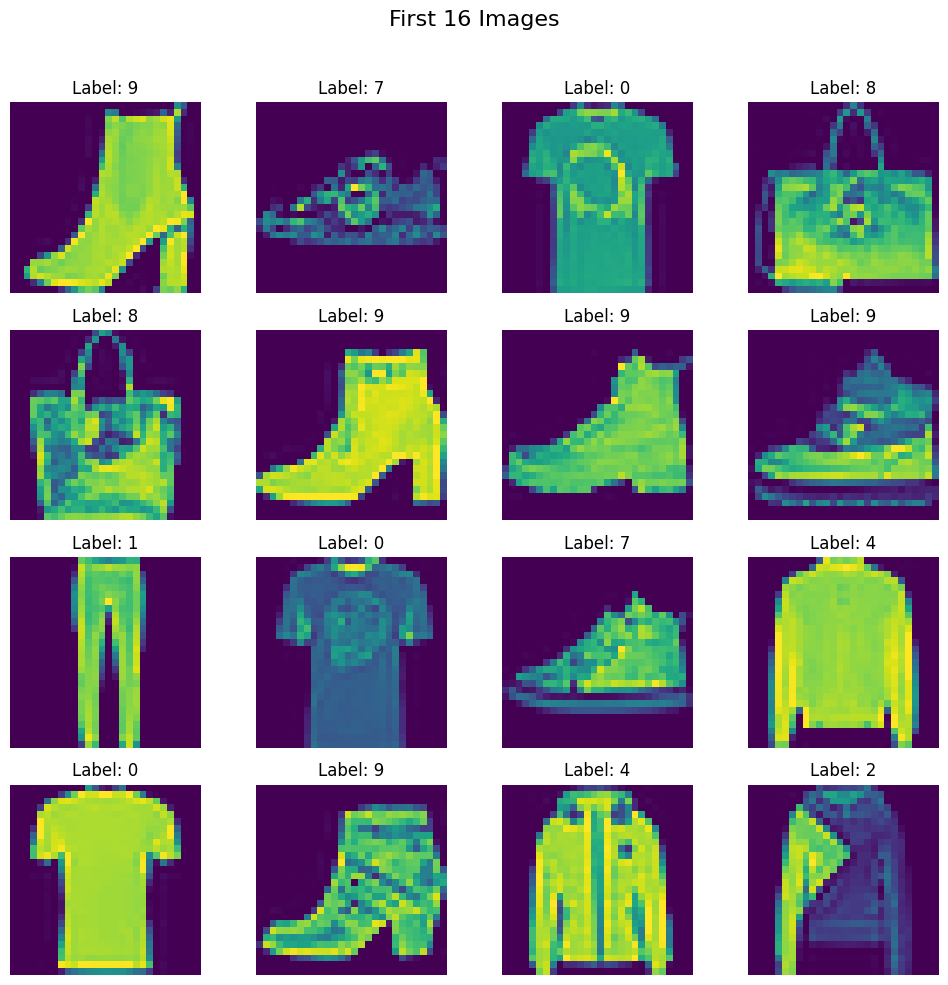

In [4]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [5]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scaling the features (pixel values from 0-255 to 0-1)
X_train = X_train/255.0  # Normalize training data to range [0, 1]
X_test = X_test/255.0    # Normalize test data using same scaling

# Why we do this:
# 1. Neural networks train faster and more stably with small input values (0-1)
# 2. Prevents certain pixels from dominating others due to larger values
# 3. 255 is used because pixel values range from 0 to 255 (8-bit images)

In [9]:
X_train # We can now see every value is between 0 and 1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00024606, 0.        ,
        0.        ]])

In [10]:
# Create Custom Dataset Class
class FashionDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [12]:
# Create Train Dataset Object
train_dataset = FashionDataset(X_train, y_train)

In [13]:
len(train_dataset)

4800

In [14]:
train_dataset[0]

(tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e

In [33]:
# Create test_dataset object
test_dataset = FashionDataset(X_test, y_test)

In [34]:
# Create Train and Test Loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False) # You dont usually do shuffling in prediction

## Model and Training

In [35]:
# Define NN Class
class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),  # Input layer to 128 neurons
        nn.ReLU(),                      # Activation function
        nn.Linear(128, 64),             # Hidden layer 128 to 64 neurons
        nn.ReLU(),                      # Activation function
        nn.Linear(64, 10)               # Output layer: 10 classes (raw logits)
        # Note we havent added Softmax here because later Cross Entropy Loss automatically adds it
    )

  def forward(self, x):

    return self.model(x)

In [44]:
# Set learning rate and epochs
epochs = 100
learning_rate = 0.01

In [45]:
# Instantiate the model - creates the neural network object
model = MyNN(X_train.shape[1])  # Input size = number of features (784 pixels)

# Loss Function - measures how wrong the predictions are
criterion = nn.CrossEntropyLoss()  # Uses softmax internally + calculates loss

# Optimizer - updates model weights to reduce loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # Gradient descent optimizer

In [46]:
# Training loop - repeat for each epoch (full pass through dataset)
for epoch in range(epochs):

  total_epoch_loss = 0  # Track loss for this epoch

  # Process data in batches (mini-batch gradient descent)
  for batch_features, batch_labels in train_loader:

    # Forward pass - get model predictions
    outputs = model(batch_features)  # Model outputs raw scores (logits)

    # Calculate loss - compares predictions vs actual labels
    loss = criterion(outputs, batch_labels)  # Applies softmax + cross-entropy

    # Backward pass - calculate gradients
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients via backpropagation

    # Update weights - improve model
    optimizer.step()       # Adjust weights using gradients

    # Accumulate loss for monitoring
    total_epoch_loss = total_epoch_loss + loss.item()

  # Calculate average loss for this epoch
  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')  # Track training progress

Epoch: 1 , Loss: 2.307122605641683
Epoch: 2 , Loss: 2.305397531191508
Epoch: 3 , Loss: 2.304213728904724
Epoch: 4 , Loss: 2.3033945242563885
Epoch: 5 , Loss: 2.3028277015686034
Epoch: 6 , Loss: 2.302439219156901
Epoch: 7 , Loss: 2.302153517405192
Epoch: 8 , Loss: 2.301946331659953
Epoch: 9 , Loss: 2.3018178955713906
Epoch: 10 , Loss: 2.301709680557251
Epoch: 11 , Loss: 2.3016508467992147
Epoch: 12 , Loss: 2.301597514152527
Epoch: 13 , Loss: 2.301571011543274
Epoch: 14 , Loss: 2.3015441497166953
Epoch: 15 , Loss: 2.301516079902649
Epoch: 16 , Loss: 2.3014939244588217
Epoch: 17 , Loss: 2.301499926249186
Epoch: 18 , Loss: 2.301486767133077
Epoch: 19 , Loss: 2.3014713176091512
Epoch: 20 , Loss: 2.3014688158035277
Epoch: 21 , Loss: 2.3014750719070434
Epoch: 22 , Loss: 2.3014677635828655
Epoch: 23 , Loss: 2.3014561255772907
Epoch: 24 , Loss: 2.301463378270467
Epoch: 25 , Loss: 2.3014520819981894
Epoch: 26 , Loss: 2.3014565976460775
Epoch: 27 , Loss: 2.30145379225413
Epoch: 28 , Loss: 2.30144

## Evaluation

In Python, `_` is a throwaway variable name - it's convention for "I don't care about this value."

```python
# Let's say your model outputs these raw scores for 2 images:
outputs = torch.tensor([
    [1.2, 5.8, 0.3, 2.1],  # Image 1 scores for classes 0,1,2,3
    [0.9, 2.3, 4.1, 1.7]   # Image 2 scores for classes 0,1,2,3
])

# torch.max returns TWO things:
max_scores, predicted_classes = torch.max(outputs, 1)
print(max_scores)      # tensor([5.8, 4.1])   ← HOW confident
print(predicted_classes) # tensor([1, 2])     ← WHAT class
```

But for accuracy, we only care about WHAT not HOW:

```python
# We don't care if it was 90% confident or 51% confident
# We only care if it predicted the right class!

_, predicted = torch.max(outputs, 1)
# Now 'predicted' = [1, 2]  (class 1 and class 2)
# We threw away [5.8, 4.1] because we don't need confidence scores
```

In [47]:
# Set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [48]:
# Evaluation code - test model performance on unseen data
total = 0      # Track total number of test samples
correct = 0    # Track number of correct predictions

with torch.no_grad():  # Disable gradient calculation for faster inference

  for batch_features, batch_labels in test_loader:

    # Get model predictions (raw logits)
    outputs = model(batch_features)

    # Convert outputs to class predictions
    # torch.max returns (max_values, max_indices) - we take the indices (class numbers)
    _, predicted = torch.max(outputs, 1)  # Get predicted class (0-9)

    # Update counters
    total = total + batch_labels.shape[0]  # Add batch size to total
    correct = correct + (predicted == batch_labels).sum().item()  # Count correct predictions

# Calculate final accuracy
print(correct/total)  # Output: Accuracy as decimal

0.10666666666666667


The weight update rule is:

`w_new = w_old - learning_rate * gradient`

So use `learning_rate` = `0.1`.